erro quadrado 225 está errado 15 minutos

erro mais de 2000 vai ser complicado

plotar histograma predito menos real

transformar em categoricas 

usar o do pandas 

holiday já tem

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/flights.csv')

In [3]:
df.head().to_markdown()

'|    |   flight_id | airline   | aircraft_type   | schengen     | origin   |   arrival_time |   departure_time |   day |   year | is_holiday   |      delay |\n|---:|------------:|:----------|:----------------|:-------------|:---------|---------------:|-----------------:|------:|-------:|:-------------|-----------:|\n|  0 |           1 | MF        | Boeing 737      | non-schengen | KEC      |       17.6715  |          20.6715 |     0 |   2010 | False        |  -3.9897   |\n|  1 |           2 | EW        | Airbus A330     | schengen     | KXZ      |       10.5882  |          13.5882 |     0 |   2010 | False        |   3.82698  |\n|  2 |           3 | MF        | Airbus A330     | schengen     | UVR      |        8.96822 |          11.9682 |     0 |   2010 | False        | -20.6029   |\n|  3 |           4 | KW        | Embraer E175    | schengen     | YOM      |        6.17357 |          10.1736 |     0 |   2010 | False        |  -0.682961 |\n|  4 |           5 | KW        | Boeing 787  

In [4]:
df.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,8.000000,11.123075,13.989742,182.000000,2016.000000,-0.801991
std,4.320524,4.261925,4.236426,105.366769,3.741684,23.958394
min,1.000000,5.541985,8.541985,0.000000,2010.000000,-76.284596
25%,4.000000,7.948998,10.232921,91.000000,2013.000000,-18.104739
50%,8.000000,9.088392,12.017296,182.000000,2016.000000,-3.566266
75%,12.000000,15.564223,17.942155,273.000000,2019.000000,15.304571
max,15.000000,18.088507,21.778525,364.000000,2022.000000,128.063324


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [6]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 71175
Number of columns: 11


In [7]:
# Function to convert decimal time to hours and minutes
def convert_decimal_to_time(decimal_time):
    hours = int(decimal_time)
    minutes = int((decimal_time - hours) * 60)
    return f"{hours:02d}:{minutes:02d}"

# Convert arrival time column
df['arrival_time'] = df['arrival_time'].apply(convert_decimal_to_time)

# Convert departure time column
df['departure_time'] = df['departure_time'].apply(convert_decimal_to_time)

# Display the updated DataFrame
df.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,1,MF,Boeing 737,non-schengen,KEC,17:40,20:40,0,2010,False,-3.989698
1,2,EW,Airbus A330,schengen,KXZ,10:35,13:35,0,2010,False,3.826984
2,3,MF,Airbus A330,schengen,UVR,08:58,11:58,0,2010,False,-20.602880
3,4,KW,Embraer E175,schengen,YOM,06:10,10:10,0,2010,False,-0.682961
4,5,KW,Boeing 787,schengen,PZK,14:56,17:56,0,2010,False,29.889728


In [8]:
# Function to convert day and year to a regular date
def convert_day_to_date(day, year):
    base_date = datetime(year=year, month=1, day=1)
    target_date = base_date + timedelta(days=day)
    return target_date.strftime('%Y-%m-%d')  # Format the date as desired

# Convert 'day' column to regular dates
df['date'] = df.apply(lambda row: convert_day_to_date(row['day'], row['year']), axis=1)

# Display the updated DataFrame
df.head()


,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,1,MF,Boeing 737,non-schengen,KEC,17:40,20:40,0,2010,False,-3.989698,2010-01-01
1,2,EW,Airbus A330,schengen,KXZ,10:35,13:35,0,2010,False,3.826984,2010-01-01
2,3,MF,Airbus A330,schengen,UVR,08:58,11:58,0,2010,False,-20.602880,2010-01-01
3,4,KW,Embraer E175,schengen,YOM,06:10,10:10,0,2010,False,-0.682961,2010-01-01
4,5,KW,Boeing 787,schengen,PZK,14:56,17:56,0,2010,False,29.889728,2010-01-01


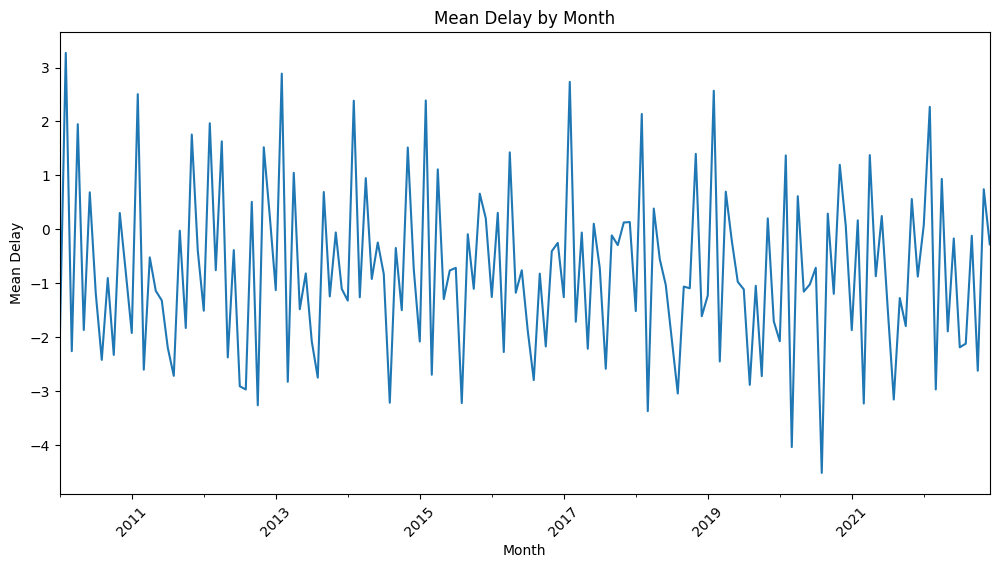

In [9]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by month and calculate the mean delay
mean_delay_by_month = df.groupby(df['date'].dt.to_period('M'))['delay'].mean()

# Create the graph
plt.figure(figsize=(12, 6))
mean_delay_by_month.plot(kind='line')
plt.title('Mean Delay by Month')
plt.xlabel('Month')
plt.ylabel('Mean Delay')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

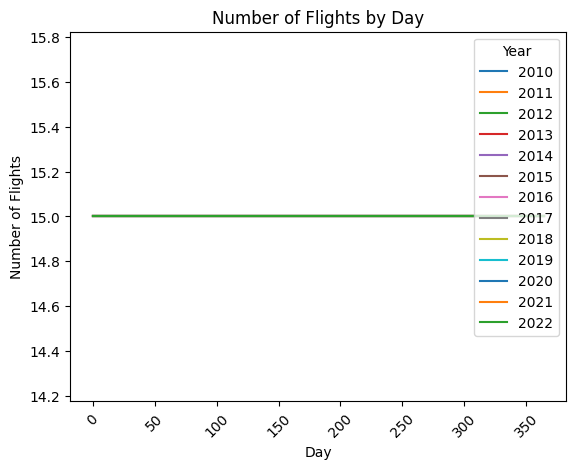

In [10]:
# Group the data by year and day, and calculate the count of flights
flight_count_by_year_day = df.groupby(['year', 'day'])['flight_id'].count().unstack('year')

# Create the graph
plt.figure(figsize=(12, 6))
flight_count_by_year_day.plot(kind='line')
plt.title('Number of Flights by Day')
plt.xlabel('Day')
plt.ylabel('Number of Flights')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='schengen', ylabel='count'>

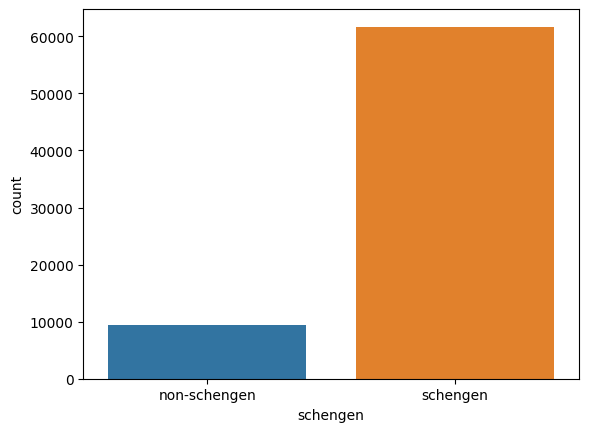

In [12]:
import seaborn as sns
#plot amout of flights schengen and non-schengen
schengen = df[df['schengen'] == True]
non_schengen = df[df['schengen'] == False]
sns.countplot(x='schengen', data=df)